In [1]:
#installing packages
install.packages("fracdiff")
install.packages("longmemo")
install.packages("TSA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘leaps’, ‘locfit’, ‘tseries’




In [2]:
#loading packages
library("fracdiff")  ### for fitting the model
library("longmemo")  
library("TSA")


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




In [3]:
#loading data
x2 = read.csv("LTCYUK.csv",header = TRUE)
x2 = x2$LTCYUK

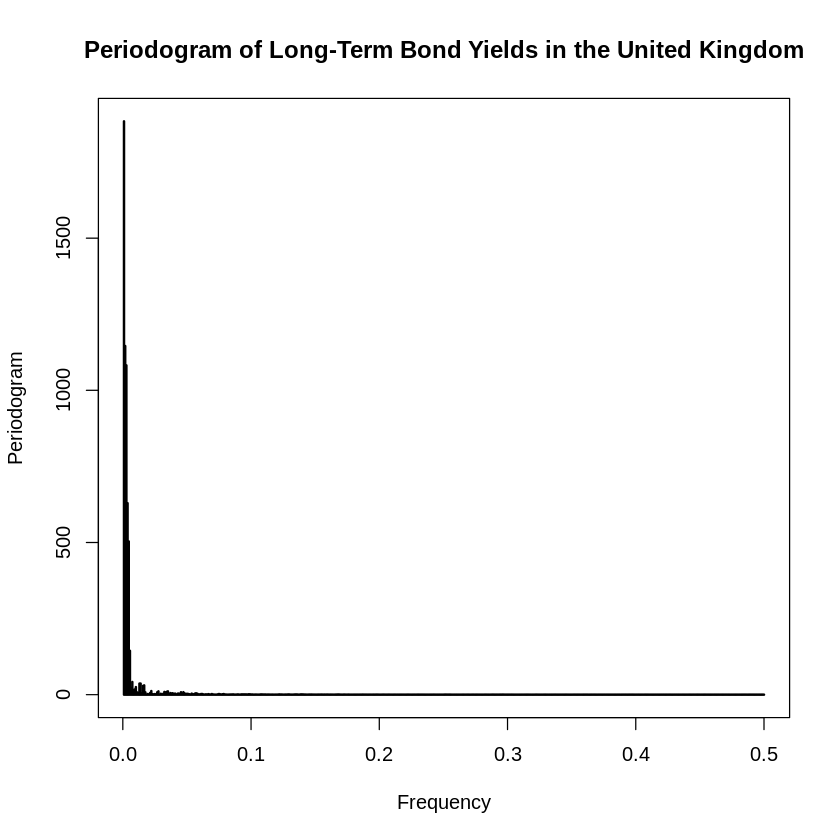

In [4]:
#plotting periodogram
periodogram(x2, main = "Periodogram of Long-Term Bond Yields in the United Kingdom")

In [5]:
#using the log-data
yt=log(x2[-1])
# with 1000 obs   
n=length(yt)      

In [15]:
### fitting FARIM(p, d, q) models with p, q=0, 1, 2
## fit all models with p, q=0, 1, 2
p=0
q=0
M00=fracdiff(yt, nar=p, nma=q)
p=0
q=1
M01=fracdiff(yt, nar=p, nma=q)
p=0
q=2
M02=fracdiff(yt, nar=p, nma=q)
p=1
q=0
M10=fracdiff(yt, nar=p, nma=q)



In [17]:
p=1
q=1
M11=fracdiff(yt, nar=p, nma=q)
p=1
q=2
M12=fracdiff(yt, nar=p, nma=q) 
##### Some models cannot be well-fitted with the follow error message 
#### "Warning:
### unable to compute correlation matrix; maybe change 'h'" 
## In this case the model is fitted without se etc of the coefficients. 
# Such a model should not be chosen.

Warning message:
“unable to compute correlation matrix; maybe change 'h'”
Warning message:
“unable to compute correlation matrix; maybe change 'h'”


In [18]:
p=2
q=0
M20=fracdiff(yt, nar=p, nma=q)

In [19]:
p=2
q=1
M21=fracdiff(yt, nar=p, nma=q)
p=2
q=2
M22=fracdiff(yt, nar=p, nma=q)
##### Some models cannot be well-fitted with the follow error message 
#### "Warning:
### unable to compute correlation matrix; maybe change 'h'" 
## In this case the model is fitted without se etc of the coefficients. 
# Such a model should not be chosen.

Warning message:
“unable to compute correlation matrix; maybe change 'h'”
Warning message:
“unable to compute correlation matrix; maybe change 'h'”


In [20]:
#fitting model
AIC(M00, k=log(n))
AIC(M01, k=log(n))
AIC(M02, k=log(n))
AIC(M10, k=log(n))
AIC(M11, k=log(n))
AIC(M12, k=log(n))
AIC(M20, k=log(n))
AIC(M21, k=log(n))
AIC(M22, k=log(n))

[1] -2628.379

[1] -3137.627

[1] -3340.495

[1] -3607.588

[1] -3600.993

[1] -3594.42

[1] -3600.539

[1] -3594.963

[1] -3588.004

In [21]:
summary(M00)


Call:
  fracdiff(x = yt, nar = p, nma = q) 

Coefficients:
   Estimate Std. Error z value Pr(>|z|)    
d 4.998e-01  1.391e-05   35917   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
sigma[eps] = 0.06874419 
[d.tol = 0.0001221, M = 100, h = 1.393e-05]
Log likelihood:  1321 ==> AIC = -2638.298 [2 deg.freedom]

In [22]:
summary(M01)


Call:
  fracdiff(x = yt, nar = p, nma = q) 

Coefficients:
     Estimate Std. Error z value Pr(>|z|)    
d   0.4995927  0.0006206  805.08   <2e-16 ***
ma -0.5724456  0.0205832  -27.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
sigma[eps] = 0.05382264 
[d.tol = 0.0001221, M = 100, h = 1.665e-05]
Log likelihood:  1579 ==> AIC = -3152.505 [3 deg.freedom]

In [23]:
summary(M02)


Call:
  fracdiff(x = yt, nar = p, nma = q) 

Coefficients:
      Estimate Std. Error z value Pr(>|z|)    
d    0.4993008  0.0009873  505.70   <2e-16 ***
ma1 -0.6726049  0.0260232  -25.85   <2e-16 ***
ma2 -0.4055493  0.0265696  -15.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
sigma[eps] = 0.04873022 
[d.tol = 0.0001221, M = 100, h = 1.776e-05]
Log likelihood:  1684 ==> AIC = -3360.333 [4 deg.freedom]

In [24]:
summary(M10)


Call:
  fracdiff(x = yt, nar = p, nma = q) 

Coefficients:
   Estimate Std. Error z value Pr(>|z|)    
d  0.070007   0.017564   3.986 6.73e-05 ***
ar 0.990387   0.004825 205.280  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
sigma[eps] = 0.04320352 
[d.tol = 0.0001221, M = 100, h = 1.913e-05]
Log likelihood:  1814 ==> AIC = -3622.466 [3 deg.freedom]

In [25]:
summary(M11)


Call:
  fracdiff(x = yt, nar = p, nma = q) 

*** Warning during (fdcov) fit: unable to compute correlation matrix; maybe change 'h'

Coefficients:
   Estimate
d     0.050
ar    0.991
ma   -0.030
sigma[eps] = 0.04319636 
[d.tol = 0.0001221, M = 100, h = 1.913e-05]
Log likelihood:  1814 ==> AIC = -3620.83 [4 deg.freedom]

In [26]:
summary(M12)


Call:
  fracdiff(x = yt, nar = p, nma = q) 

*** Warning during (fdcov) fit: unable to compute correlation matrix; maybe change 'h'

Coefficients:
    Estimate
d      0.027
ar     0.992
ma1   -0.054
ma2   -0.039
sigma[eps] = 0.04318867 
[d.tol = 0.0001221, M = 100, h = 1.913e-05]
Log likelihood:  1815 ==> AIC = -3619.217 [5 deg.freedom]

In [27]:
summary(M20)


Call:
  fracdiff(x = yt, nar = p, nma = q) 

Coefficients:
    Estimate Std. Error z value Pr(>|z|)    
d    0.05926    0.01203   4.927 8.34e-07 ***
ar1  1.01367    0.02342  43.275  < 2e-16 ***
ar2 -0.02253    0.02329  -0.967    0.333    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
sigma[eps] = 0.04320554 
[d.tol = 0.0001221, M = 100, h = 1.913e-05]
Log likelihood:  1814 ==> AIC = -3620.376 [4 deg.freedom]

In [28]:
summary(M21)


Call:
  fracdiff(x = yt, nar = p, nma = q) 

*** Warning during (fdcov) fit: unable to compute correlation matrix; maybe change 'h'

Coefficients:
    Estimate
d      0.126
ar1    1.802
ar2   -0.803
ma     0.857
sigma[eps] = 0.04317546 
[d.tol = 0.0001221, M = 100, h = 1.913e-05]
Log likelihood:  1815 ==> AIC = -3619.76 [5 deg.freedom]

In [29]:
summary(M22)


Call:
  fracdiff(x = yt, nar = p, nma = q) 

*** Warning during (fdcov) fit: unable to compute correlation matrix; maybe change 'h'

Coefficients:
    Estimate
d      0.125
ar1    1.802
ar2   -0.804
ma1    0.856
ma2    0.001
sigma[eps] = 0.04317549 
[d.tol = 0.0001221, M = 100, h = 1.913e-05]
Log likelihood:  1815 ==> AIC = -3617.76 [6 deg.freedom]

In [30]:
# for this data p=1, q=0 was selected by BIC.
M.BIC=fracdiff(yt, nar=1, nma=0)

In [31]:
# simulating the p-value for a time series
xi=M.BIC$residuals

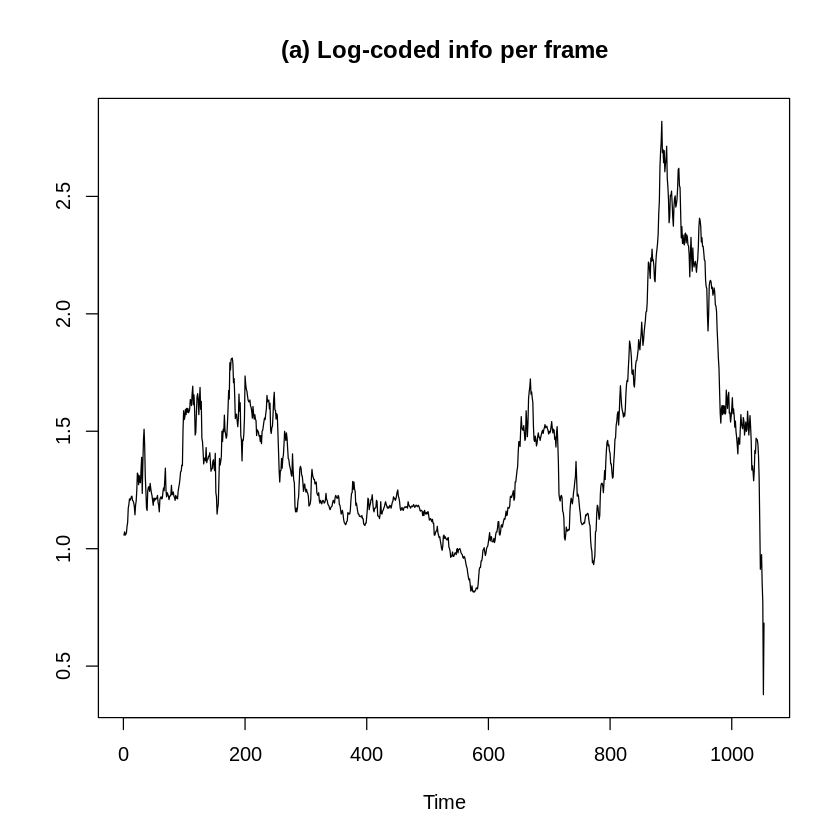

In [32]:
#plotting figures
plot.ts(yt, type="l", ylab="")
title("(a) Log-coded info per frame")

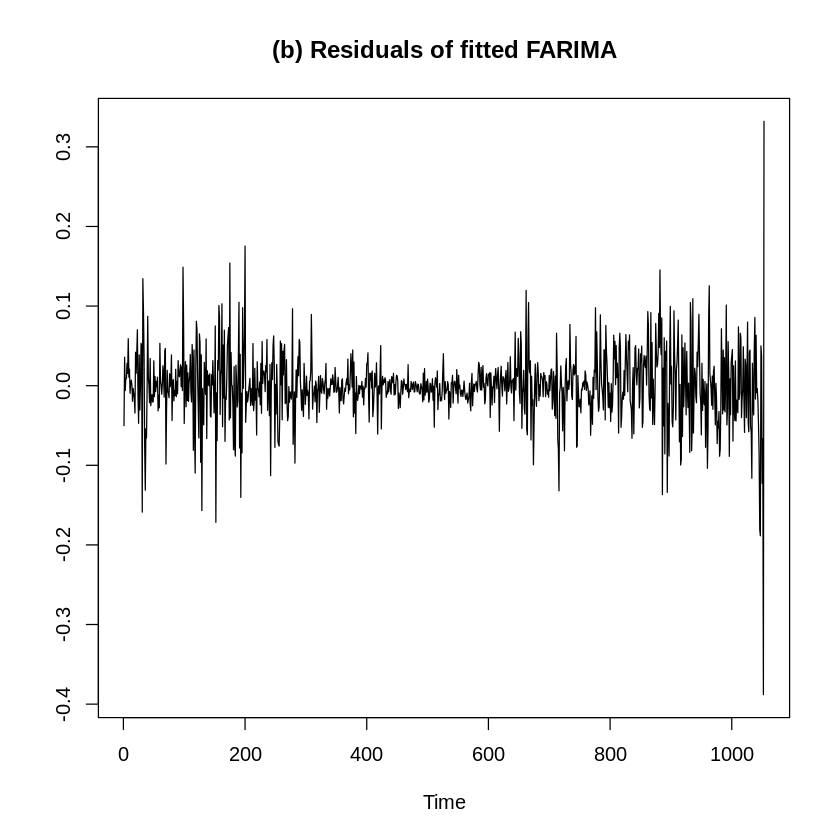

In [33]:
plot.ts(xi, type="l", ylab="")
title("(b) Residuals of fitted FARIMA")

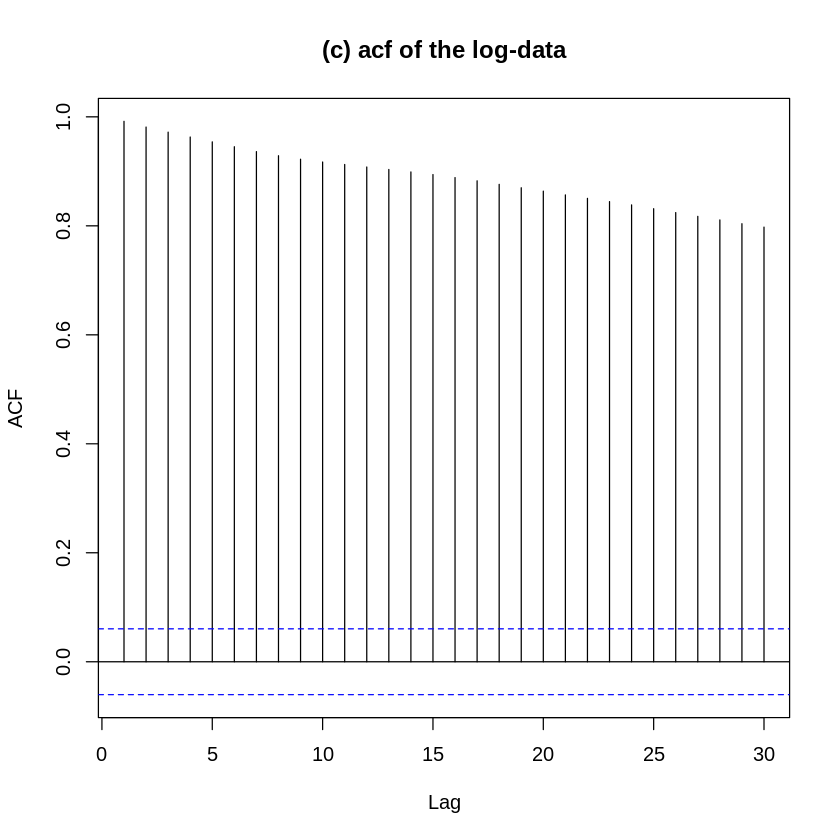

In [34]:
acf(yt, lag.max=30, main="(c) acf of the log-data")

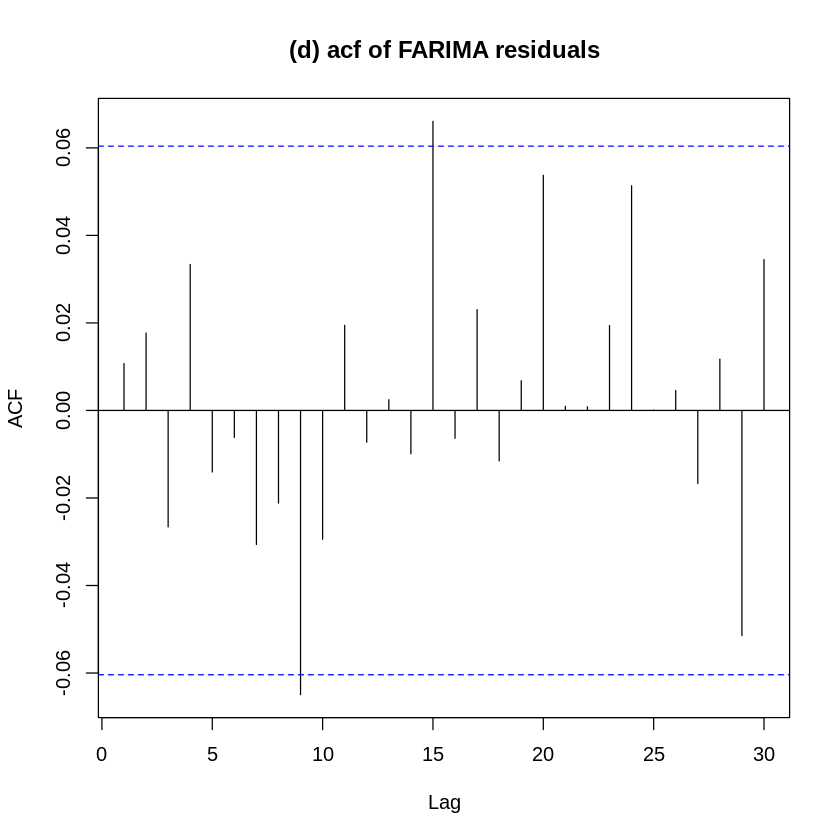

In [35]:
acf(xi, lag.max=30, main="(d) acf of FARIMA residuals")

In [36]:
summary(M.BIC)


Call:
  fracdiff(x = yt, nar = 1, nma = 0) 

Coefficients:
   Estimate Std. Error z value Pr(>|z|)    
d  0.070007   0.017564   3.986 6.73e-05 ***
ar 0.990387   0.004825 205.280  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
sigma[eps] = 0.04320352 
[d.tol = 0.0001221, M = 100, h = 1.913e-05]
Log likelihood:  1814 ==> AIC = -3622.466 [3 deg.freedom]